In [2]:
import SimpleITK as sitk
import numpy as np

from matplotlib import pyplot as plt

from os import path

File locations

In [7]:
data_dir = "/Users/nathanneeteson/Documents/Data/Images/SALTACII"
nifti_dir = "niftis"
atlas_mask_dir = "atlas_registrations"

img_name = "sltcii0002"
side = "l"
visit = "v01"

Load the data:

In [8]:
imgs = {}

for bone in ["f", "t"]:

    imgs[bone] = sitk.GetArrayFromImage(sitk.ReadImage(path.join(
        data_dir, nifti_dir, f"{img_name}_{bone}{side}_{visit}.nii.gz"
    )))

In [10]:
masks = {}

for bone in ["f", "t"]:
    
    masks[bone] = sitk.GetArrayFromImage(sitk.ReadImage(path.join(
        data_dir, atlas_mask_dir, f"{img_name}_{bone}{side}_{visit}_atlas_mask_transformed.nii.gz"
    )))

Create visualizations:

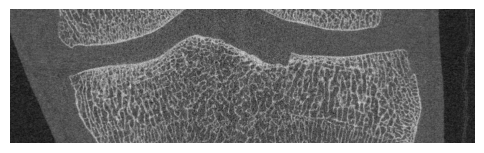

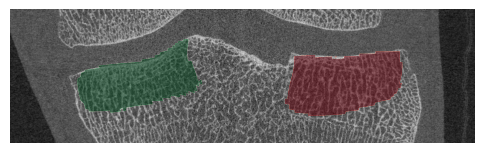

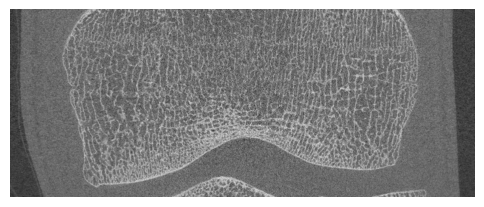

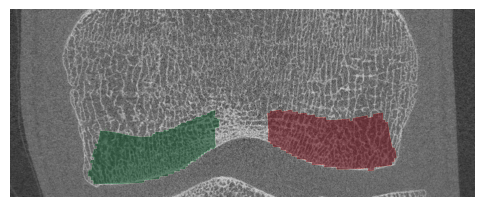

In [33]:
alpha = 0.5

st = (slice(None), 600, slice(None))

for bone in ["t", "f"]:

    for i in range(2):

        plt.figure(figsize=(6,6))

        plt.axis(False)

        plt.imshow(np.flipud(imgs[bone][st]), cmap="gist_gray")
        if i==1:
            plt.imshow(np.flipud(masks[bone][st])==1, cmap="Reds", alpha=alpha*(np.flipud(masks[bone][st])==1))
            plt.imshow(np.flipud(masks[bone][st])==2, cmap="Greens", alpha=alpha*(np.flipud(masks[bone][st])==2))
        
        plt.savefig(f"{bone}_{'mask' if i==1 else 'nomask'}.png", dpi=200, bbox_inches="tight")
        
        plt.show()